## **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import mnist
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## **Data Preparation**

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data() #Default: 85% training 15% testing

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

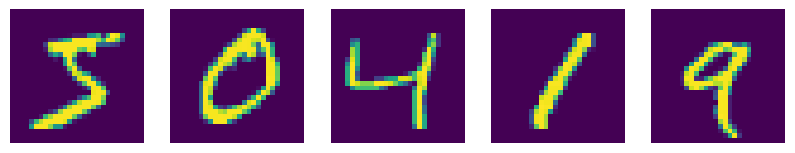

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')

plt.show()

In [ ]:
y_train[2] #x_train[0] shows number 5

4

In [ ]:
x_train[0][5][13] #image 0, row 5, pixel 13

18

## **Data Transformations**

In [ ]:
#convert numbers in each cell from 0-255 -> 0.0-1.0
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0

In [ ]:
x_train_normalized[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train_normalized[0][5][13] #image 0, row 5, pixel 13 is now transformed from 18 into 0.07...

0.07058823529411765

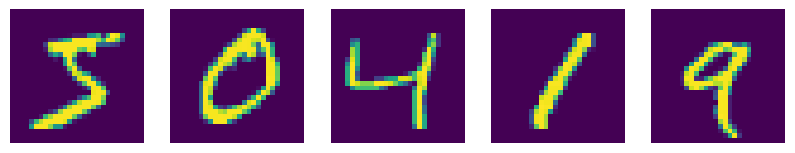

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    axs[i].imshow(x_train_normalized[i])
    axs[i].axis('off')

plt.show()

## **Define functions to visualize & train model**

In [ ]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

In [ ]:
def create_model():

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # First hidden layer: 256 nodes

  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  # Second hidden layer: 128 nodes
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  # Third hidden layer: 64 nodes
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))

  # Dropout regularization rate: 0.1
  model.add(tf.keras.layers.Dropout(rate=0.1))

  # Define the output layer: digits from 0 to 9, inclusive.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  # loss function for multi-class (0-9) classification
  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy", #true vs predicted labels
                metrics=['accuracy'])
  #optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate)

  return model

In [ ]:
def train_model(model, train_features, train_label, epochs, batch_size, validation_split):
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size, epochs=epochs,
                      shuffle=True, validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  return epochs, hist

## **Classify and Visualize results**

In [ ]:
# Hyperparameters.
epochs = 25
batch_size = 1000
validation_split = 0

Epoch 1/25
60/60 [==============================] - 4s 30ms/step - loss: 0.6332 - accuracy: 0.8300
Epoch 2/25
60/60 [==============================] - 2s 30ms/step - loss: 0.2210 - accuracy: 0.9356
Epoch 3/25
60/60 [==============================] - 2s 29ms/step - loss: 0.1572 - accuracy: 0.9545
Epoch 4/25
60/60 [==============================] - 2s 40ms/step - loss: 0.1233 - accuracy: 0.9643
Epoch 5/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0999 - accuracy: 0.9704
Epoch 6/25
60/60 [==============================] - 2s 38ms/step - loss: 0.0822 - accuracy: 0.9763
Epoch 7/25
60/60 [==============================] - 2s 30ms/step - loss: 0.0690 - accuracy: 0.9801
Epoch 8/25
60/60 [==============================] - 2s 36ms/step - loss: 0.0589 - accuracy: 0.9831
Epoch 9/25
60/60 [==============================] - 3s 48ms/step - loss: 0.0507 - accuracy: 0.9854
Epoch 10/25
60/60 [==============================] - 2s 30ms/step - loss: 0.0432 - accuracy: 0.9874
Epoch 11/

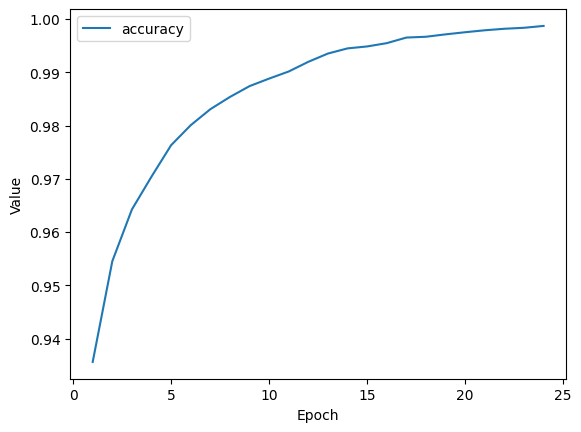

In [ ]:
my_model = create_model()
#train model on the normalized dataset
epochs, hist = train_model(my_model, x_train_normalized, y_train, epochs, batch_size, validation_split)

#plot metrics vs epochs
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

## **Model performance accuracy**

313/313 [==============================] - 1s 3ms/step


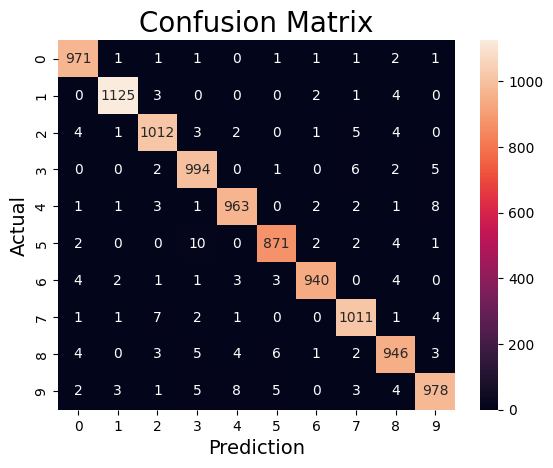

In [ ]:
y_pred = my_model.predict(x_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels, labels=[0,1,2,3,4,5,6,7,8,9])
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[0,1,2,3,4,5,6,7,8,9],
            yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.ylabel('Actual',fontsize=14)
plt.xlabel('Prediction',fontsize=14)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

In [ ]:
# Evaluate against the test set.
my_model.evaluate(x_test_normalized, y_test, batch_size)

10/10 [==============================] - 0s 16ms/step - loss: 0.0697 - accuracy: 0.9811


[0.06965871900320053, 0.9811000227928162]

In [ ]:
import numpy as np
from PIL import Image
from skimage.transform import resize

In [ ]:
x_test_new = []
y_test_new = np.array([0,1,2,3,4,5,6,7,8,9], dtype='uint8')

In [ ]:
for i in range(10):
  # Open the image
  image = Image.open(str(i)+'.png')

  # Convert the image to grayscale
  image_gray = image.convert('L')

  # Convert the image to a NumPy array
  image_array = np.array(image_gray)
  resized_array = resize(image_array, (28, 28), anti_aliasing=True) #already normalized
  x_test_new.append(resized_array)

In [ ]:
x_test_new = np.array(x_test_new).tolist()
x_test_new = np.array(x_test_new)

In [ ]:
my_model.evaluate(x_test_new, y_test_new)

1/1 [==============================] - 0s 33ms/step - loss: 1.2305 - accuracy: 0.9000


[1.2304906845092773, 0.8999999761581421]

1/1 [==============================] - 0s 25ms/step


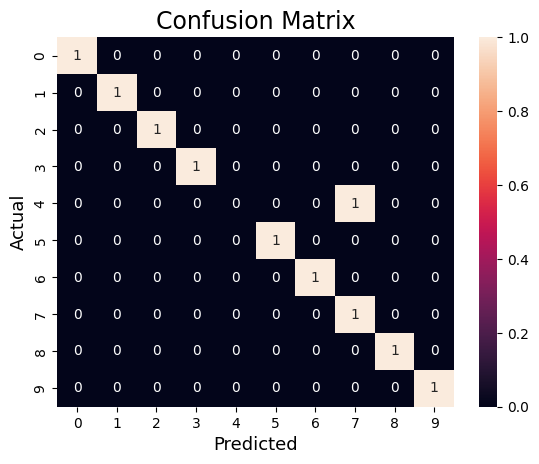

In [ ]:
y_pred = my_model.predict(x_test_new)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_new, y_pred_labels, labels=[0,1,2,3,4,5,6,7,8,9])
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[0,1,2,3,4,5,6,7,8,9],
            yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()